#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


#### Importing data

In [2]:
# Load the dataset
BEBRASK_task = pd.read_excel("/Users/violetapascuallaborda/Desktop/Analysis/BEBRASK_task.xlsx")
RETOS_task = pd.read_excel("/Users/violetapascuallaborda/Desktop/Analysis/RETOS_task.xlsx")

### **Preprocessing**

#### Select relevant columns

In [3]:
df = pd.concat([BEBRASK_task, RETOS_task], ignore_index=True)
df = df[['DataFile.Basename', 'ScenarioPick', 'TrialCount', 'EvokedEmotion', 'Expression', 'Fulfilled', 'Rating0.RESP', 'Rating.RESP', 'Rating0.RT', 'Rating.RT']]

# Drop the rows with Nan in all the columns
df = df.dropna(subset=['ScenarioPick', 'TrialCount', 'EvokedEmotion', 'Expression', 'Fulfilled', 'Rating0.RESP', 'Rating.RESP', 'Rating0.RT', 'Rating.RT'], how='all')
df

,DataFile.Basename,ScenarioPick,TrialCount,EvokedEmotion,Expression,Fulfilled,Rating0.RESP,Rating.RESP,Rating0.RT,Rating.RT
7,PREDWELL_RETOS-1001-1,14.0,1.0,sadness,Sad,1.0,3.0,4.0,1789.0,1328.0
8,PREDWELL_RETOS-1001-1,41.0,2.0,fear,Sad,0.0,3.0,3.0,768.0,744.0
9,PREDWELL_RETOS-1001-1,4.0,3.0,sadness,Fear,0.0,1.0,4.0,1200.0,1389.0
10,PREDWELL_RETOS-1001-1,16.0,4.0,happiness,Fear,0.0,4.0,4.0,725.0,595.0
11,PREDWELL_RETOS-1001-1,8.0,5.0,sadness,Sad,1.0,2.0,4.0,613.0,1602.0
...,...,...,...,...,...,...,...,...,...,...
7795,PREDWELL_RETOS-420-1,1.0,41.0,sadness,Fear,0.0,2.0,2.0,803.0,1336.0
7796,PREDWELL_RETOS-420-1,25.0,42.0,happiness,Happy,1.0,4.0,4.0,739.0,1595.0
7797,PREDWELL_RETOS-420-1,8.0,43.0,sadness,Happy,0.0,2.0,2.0,716.0,1603.0
7798,PREDWELL_RETOS-420-1,18.0,44.0,happiness,Sad,0.0,1.0,2.0,385.0,318.0


#### Check if every participant has answered the same scenarios

In [4]:
# Group by participant_id, EvokedEmotion, Expression and Fulfilled, and count the number of scenarios
scenarios_counts = df.groupby(['DataFile.Basename', 'EvokedEmotion', 'Expression', 'Fulfilled']).size().reset_index(name='count')

# Pivot the DataFrame for easier comparison
pivoted_counts = scenarios_counts.pivot_table(index=['EvokedEmotion', 'Expression', 'Fulfilled'], columns='DataFile.Basename', values='count')

# Check if all columns (participants) are equal
mismatch = pivoted_counts.ne(pivoted_counts.iloc[:, 0], axis=0)

# Find the participants that do not match
participants_with_mismatch = mismatch.any(axis=0)

# Display the participants that do not match
mismatched_participants = participants_with_mismatch[participants_with_mismatch].index.tolist()

# Display the result
print(f"Participants with mismatched scenario counts: {mismatched_participants}")

Participants with mismatched scenario counts: ['PREDWELL_RETOS-307-1', 'PREDWELL_RETOS-307-3']


#### Compare one ordinary participant with the two mismatched participants

In [5]:
participant_ids = ['PREDWELL_RETOS-1001-1', 'PREDWELL_RETOS-307-1', 'PREDWELL_RETOS-307-3']

for participant_id in participant_ids:
    # Filter the DataFrame by the participant ID
    filtered_df = df[df['DataFile.Basename'] == participant_id]
    
    # Group by emotion and fulfilled, then count the number of scenarios
    grouped_counts = filtered_df.groupby(['EvokedEmotion', 'Expression', 'Fulfilled']).size().reset_index(name='count')
    
    # Display the result
    print(f"Counts for participant {participant_id}:")
    print(grouped_counts)
    print()

Counts for participant PREDWELL_RETOS-1001-1:
  EvokedEmotion Expression  Fulfilled  count
0          fear       Fear        1.0      9
1          fear      Happy        0.0      3
2          fear        Sad        0.0      3
3     happiness       Fear        0.0      3
4     happiness      Happy        1.0      9
5     happiness        Sad        0.0      3
6       sadness       Fear        0.0      3
7       sadness      Happy        0.0      3
8       sadness        Sad        1.0      9

Counts for participant PREDWELL_RETOS-307-1:
  EvokedEmotion Expression  Fulfilled  count
0          fear       Fear        1.0      4
1          fear      Happy        0.0      2
2          fear        Sad        0.0      2
3     happiness       Fear        0.0      1
4     happiness      Happy        1.0      6
5     happiness        Sad        0.0      2
6       sadness       Fear        0.0      2
7       sadness      Happy        0.0      2
8       sadness        Sad        1.0      6

Counts 

In [6]:
# Removing these two participants as they didn't anwer to the same scenarios
df = df.query('`DataFile.Basename` not in @participant_ids')

In [7]:
# Prove if there is any Nan
df.isnull().sum()

DataFile.Basename      0
ScenarioPick           0
TrialCount             0
EvokedEmotion          0
Expression             0
Fulfilled              0
Rating0.RESP          45
Rating.RESP          133
Rating0.RT             0
Rating.RT              0
dtype: int64

#### Check if there are more than 3 NaN values that share the same 'DataFile.Basename', 'EvokedEmotion' and 'Expression'. If there are, we can't impute the missing values with the mean. We need at least one value to calculate the mean

In [8]:
# Filter rows with null values in any of the specified columns
rows_with_nans = df[df.isna().any(axis=1)]

# Group by 'DataFile.Basename', 'EvokedEmotion', 'Expression' and count occurrences
duplicate_nans = rows_with_nans.groupby(['DataFile.Basename', 'EvokedEmotion', 'Expression']).size().reset_index(name='count')

# Filter groups that have more than one occurrence
duplicates = duplicate_nans[duplicate_nans['count'] > 2]

# Display the result
print("Groups with duplicate null values in 'DataFile.Basename', 'EvokedEmotion', and 'Expression':")
print(duplicates)

Groups with duplicate null values in 'DataFile.Basename', 'EvokedEmotion', and 'Expression':
        DataFile.Basename EvokedEmotion Expression  count
109  PREDWELL_RETOS-204-1          fear       Fear      3


#### Impute missing values with the average of matching 'EvokedEmotion', 'Expression' and 'DataFile.Basename', then round to the nearest integer (1, 2, 3, or 4)

In [9]:
# Impute missing values for Rating0.RESP
df['Rating0.RESP'] = df.groupby(['DataFile.Basename', 'EvokedEmotion', 'Expression'])['Rating0.RESP'].transform(lambda x: x.fillna(x.mean()))
# Impute missing values for Rating.RESP
df['Rating.RESP'] = df.groupby(['DataFile.Basename', 'EvokedEmotion', 'Expression'])['Rating.RESP'].transform(lambda x: x.fillna(x.mean()))

# Round imputed values to the nearest integer and ensure they are in {1, 2, 3, 4}
df['Rating0.RESP'] = df['Rating0.RESP'].apply(lambda x: np.clip(round(x), 1, 4))
df['Rating.RESP'] = df['Rating.RESP'].apply(lambda x: np.clip(round(x), 1, 4))

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/2385230719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating0.RESP'] = df.groupby(['DataFile.Basename', 'EvokedEmotion', 'Expression'])['Rating0.RESP'].transform(lambda x: x.fillna(x.mean()))
/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/2385230719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating.RESP'] = df.groupby(['DataFile.Basename', 'EvokedEmotion', 'Expression'])['Rating.RESP'].transform(lamb

In [10]:
# Prove if there is any Nan
print(df.isnull().sum())

DataFile.Basename    0
ScenarioPick         0
TrialCount           0
EvokedEmotion        0
Expression           0
Fulfilled            0
Rating0.RESP         0
Rating.RESP          0
Rating0.RT           0
Rating.RT            0
dtype: int64


### **Preliminary Analisis**

#### Average response and average reaction time for the predictability (“Rating0") and likeability (“Rating") variables

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/637765602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fulfilled_condition'] = df['Fulfilled'].map({0: 'Not Fulfilled', 1: 'Fulfilled'})
/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/637765602.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Happiness', 'Sadness', 'Fear'])
/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/637765602.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Happiness', 'Sadness', 'Fear'])


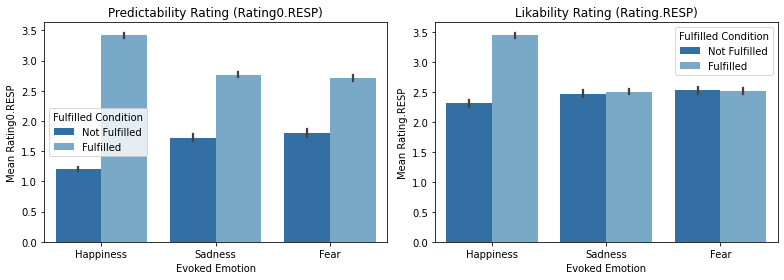

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/637765602.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating0.RT_adj'] = df['Rating0.RT'] / 1000
/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/637765602.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating.RT_adj'] = df['Rating.RT'] / 1000
/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/637765602.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.

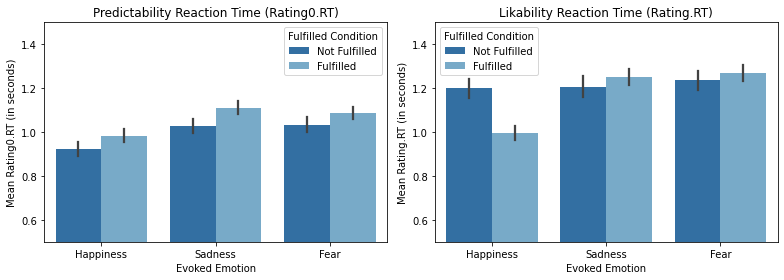

In [11]:
# Create a new column 'Fulfilled' as string for color differentiation
df['Fulfilled_condition'] = df['Fulfilled'].map({0: 'Not Fulfilled', 1: 'Fulfilled'})

# Set an order
emotion_order = ['happiness', 'sadness', 'fear']

# Define a custom color palette using the 'Blues' palette from seaborn
palette = sns.color_palette('Blues', n_colors=3)
custom_palette = {'Fulfilled': palette[1], 'Not Fulfilled': palette[2]}

# Create the first figure for Rating0.RESP and Rating.RESP
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Plot for Rating0.RESP
sns.barplot(x='EvokedEmotion', y='Rating0.RESP', hue='Fulfilled_condition', data=df, ax=axes[0], palette=custom_palette, order=emotion_order)
axes[0].set_title('Predictability Rating (Rating0.RESP)')
axes[0].set_xlabel('Evoked Emotion')
axes[0].set_ylabel('Mean Rating0.RESP')
axes[0].set_xticklabels(['Happiness', 'Sadness', 'Fear'])

# Plot for Rating.RESP
sns.barplot(x='EvokedEmotion', y='Rating.RESP', hue='Fulfilled_condition', data=df, ax=axes[1], palette=custom_palette, order=emotion_order)
axes[1].set_title('Likability Rating (Rating.RESP)')
axes[1].set_xlabel('Evoked Emotion')
axes[1].set_ylabel('Mean Rating.RESP')
axes[1].set_xticklabels(['Happiness', 'Sadness', 'Fear'])

# Update legend title
axes[0].legend(title='Fulfilled Condition')
axes[1].legend(title='Fulfilled Condition')

plt.tight_layout()
plt.show()

# Create the second figure for Rating0.RT and Rating.RT
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Convert RT to mean between 1000
df['Rating0.RT_adj'] = df['Rating0.RT'] / 1000
df['Rating.RT_adj'] = df['Rating.RT'] / 1000

# Plot for Rating0.RT
sns.barplot(x='EvokedEmotion', y='Rating0.RT_adj', hue='Fulfilled_condition', data=df, ax=axes[0], palette=custom_palette, order=emotion_order)
axes[0].set_title('Predictability Reaction Time (Rating0.RT)')
axes[0].set_xlabel('Evoked Emotion')
axes[0].set_ylabel('Mean Rating0.RT (in seconds)')
axes[0].set_ylim(0.5, 1.5)
axes[0].set_xticklabels(['Happiness', 'Sadness', 'Fear'])

# Plot for Rating.RT
sns.barplot(x='EvokedEmotion', y='Rating.RT_adj', hue='Fulfilled_condition', data=df, ax=axes[1], palette=custom_palette, order=emotion_order)
axes[1].set_title('Likability Reaction Time (Rating.RT)')
axes[1].set_xlabel('Evoked Emotion')
axes[1].set_ylabel('Mean Rating.RT (in seconds)')
axes[1].set_ylim(0.5, 1.5)
axes[1].set_xticklabels(['Happiness', 'Sadness', 'Fear'])

# Update legend title
axes[0].legend(title='Fulfilled Condition')
axes[1].legend(title='Fulfilled Condition')

plt.tight_layout()
plt.show()

### **Feature Creation**

#### Mean predictability, distinguishing between positive and negative scenarios

In [12]:
# Assign the value of 'EmotionValence' based on the emotion
df['EmotionValence'] = df['EvokedEmotion'].apply(lambda x: 'Positive' if x == 'happiness' else 'Negative')

# Calculate mean predictability
df_predictability_mean = df.groupby(['DataFile.Basename', 'EmotionValence'])['Rating0.RESP'].mean().reset_index()
df_features = df_predictability_mean.pivot_table(index='DataFile.Basename', columns='EmotionValence', values='Rating0.RESP').reset_index()
df_features.columns = ['Participant_ID', 'Mean_Predictability_Negative', 'Mean_Predictability_Positive']

df_features['Mean_Predictability_Negative'] = df_features['Mean_Predictability_Negative'] - 2.5
df_features['Mean_Predictability_Positive'] = df_features['Mean_Predictability_Positive'] - 2.5

df_features

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/1238793768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EmotionValence'] = df['EvokedEmotion'].apply(lambda x: 'Positive' if x == 'happiness' else 'Negative')


,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive
0,PREDWELL_RETOS-1-1,0.366667,0.433333
1,PREDWELL_RETOS-10-1,0.033333,0.033333
2,PREDWELL_RETOS-1002-1,0.166667,0.300000
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667
...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667
146,PREDWELL_RETOS-8-1,0.200000,-0.233333


#### Predictive ability & Difference between match and non match scenarios, distinguishing between positive and negative scenarios

In [13]:
# Group by 'DataFile.Basename', 'EmotionValence', and 'Fulfilled', and calculate the mean of the predictabilities
df_grouped = df.groupby(['DataFile.Basename', 'EmotionValence', 'Fulfilled'])['Rating0.RESP'].mean().reset_index()

# Pivot the dataframe to get separate columns for 'Negative_Match', 'Negative_Non_Match', 'Positive_Match', 'Positive_Non_Match'
df_pivot = df_grouped.pivot_table(index='DataFile.Basename', columns=['EmotionValence', 'Fulfilled'], values='Rating0.RESP').reset_index()
df_pivot.columns = ['Participant_ID', 'Predictability_Negative_Non_Match', 'Predictability_Negative_Match', 'Predictability_Positive_Non_Match', 'Predictability_Positive_Match']

# Function to normalize predictabilities
def normalize_predictability(predictability, fulfilled=True):
    if fulfilled:
        # Fulfilled scenarios: positive if > 2.5, negative if < 2.5
        normalized = predictability - 2.5
    else:
        # Non-fulfilled scenarios: positive if < 2.5, negative if > 2.5
        normalized = 2.5 - predictability
    return normalized

# Apply normalization to predictabilities
df_pivot['Predictability_Positive_Match_Normalized'] = normalize_predictability(df_pivot['Predictability_Positive_Match'], fulfilled=True)
df_pivot['Predictability_Positive_Non_Match_Normalized'] = normalize_predictability(df_pivot['Predictability_Positive_Non_Match'], fulfilled=False)
df_pivot['Predictability_Negative_Match_Normalized'] = normalize_predictability(df_pivot['Predictability_Negative_Match'], fulfilled=True)
df_pivot['Predictability_Negative_Non_Match_Normalized'] = normalize_predictability(df_pivot['Predictability_Negative_Non_Match'], fulfilled=False)

# Calculate the mean of normalized predictabilities and the difference between the means of match and non match scenarios
df_pivot['Predictive_Ability_Negative'] = df_pivot[['Predictability_Negative_Match_Normalized', 'Predictability_Negative_Non_Match_Normalized']].mean(axis=1)
df_pivot['Predictive_Ability_Positive'] = df_pivot[['Predictability_Positive_Match_Normalized', 'Predictability_Positive_Non_Match_Normalized']].mean(axis=1)

df_pivot['Match_Difference_Negative'] = df_pivot['Predictability_Negative_Match']-df_pivot['Predictability_Negative_Non_Match']
df_pivot['Match_Difference_Positive'] = df_pivot['Predictability_Positive_Match']-df_pivot['Predictability_Positive_Non_Match']

# Drop the intermediate columns
df_pivot = df_pivot[['Participant_ID', 'Predictive_Ability_Negative', 'Predictive_Ability_Positive', 'Match_Difference_Negative', 'Match_Difference_Positive']]

# Merge to df_features
df_features = pd.merge(df_features, df_pivot, on='Participant_ID')
df_features

,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive,Predictive_Ability_Negative,Predictive_Ability_Positive,Match_Difference_Negative,Match_Difference_Positive
0,PREDWELL_RETOS-1-1,0.366667,0.433333,0.652778,1.194444,1.305556,2.388889
1,PREDWELL_RETOS-10-1,0.033333,0.033333,0.375000,1.000000,0.750000,2.000000
2,PREDWELL_RETOS-1002-1,0.166667,0.300000,0.416667,1.222222,0.833333,2.444444
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000,0.500000,1.166667,1.000000,2.333333
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667,0.138889,0.388889,0.277778,0.777778
...,...,...,...,...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333,0.541667,0.916667,1.083333,1.833333
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000,0.375000,1.027778,0.750000,2.055556
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667,0.458333,1.111111,0.916667,2.222222
146,PREDWELL_RETOS-8-1,0.200000,-0.233333,0.305556,1.055556,0.611111,2.111111


#### Predictability and Likeability Reaction Time

In [14]:
# Group by 'DataFile.Basename' and calculate the mean of the predictability and likeability RT
df_predictability_RT = df.groupby(['DataFile.Basename'])['Rating0.RT'].mean().reset_index()
df_likeability_RT = df.groupby(['DataFile.Basename'])['Rating.RT'].mean().reset_index()

# Rename the columns to avoid confusion in the merge step
df_predictability_RT.columns = ['Participant_ID', 'Mean_Predictability_RT']
df_likeability_RT.columns = ['Participant_ID', 'Mean_Likeability_RT']

df_predictability_RT[['Mean_Predictability_RT']] = df_predictability_RT[['Mean_Predictability_RT']]/1000
df_likeability_RT[['Mean_Likeability_RT']] = df_likeability_RT[['Mean_Likeability_RT']]/1000

# Merge to df_features
df_features = pd.merge(df_features, df_predictability_RT, on='Participant_ID')
df_features = pd.merge(df_features, df_likeability_RT, on='Participant_ID')

df_features

,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive,Predictive_Ability_Negative,Predictive_Ability_Positive,Match_Difference_Negative,Match_Difference_Positive,Mean_Predictability_RT,Mean_Likeability_RT
0,PREDWELL_RETOS-1-1,0.366667,0.433333,0.652778,1.194444,1.305556,2.388889,0.953844,0.985267
1,PREDWELL_RETOS-10-1,0.033333,0.033333,0.375000,1.000000,0.750000,2.000000,1.057556,1.421800
2,PREDWELL_RETOS-1002-1,0.166667,0.300000,0.416667,1.222222,0.833333,2.444444,0.849711,1.373356
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000,0.500000,1.166667,1.000000,2.333333,0.697067,1.218022
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667,0.138889,0.388889,0.277778,0.777778,1.096356,1.764933
...,...,...,...,...,...,...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333,0.541667,0.916667,1.083333,1.833333,0.983622,0.860244
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000,0.375000,1.027778,0.750000,2.055556,1.137444,1.652133
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667,0.458333,1.111111,0.916667,2.222222,1.226067,0.959311
146,PREDWELL_RETOS-8-1,0.200000,-0.233333,0.305556,1.055556,0.611111,2.111111,0.818778,1.153400


#### Correlation. Distance between predictability and likeability of each scenario

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/940081902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance'] = df.apply(lambda row: abs(row['Rating0.RESP'] - row['Rating.RESP']), axis=1)


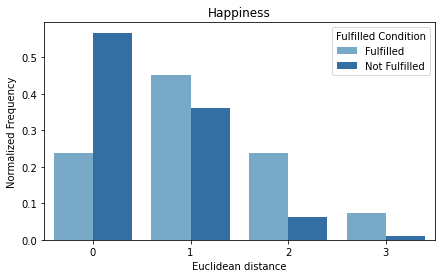

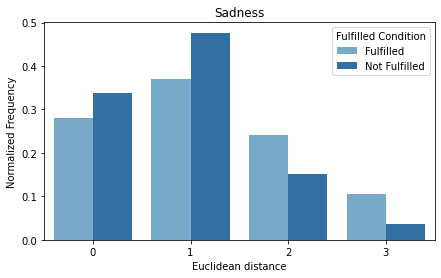

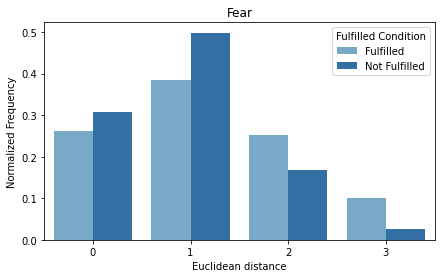

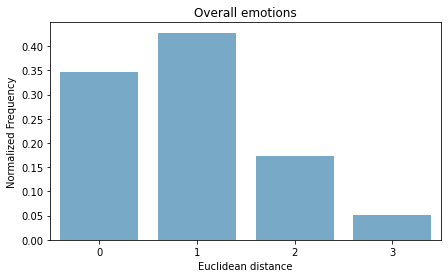

In [15]:
# Calculate the discrete distance for each pair of values
df['Distance'] = df.apply(lambda row: abs(row['Rating0.RESP'] - row['Rating.RESP']), axis=1)

# Calculate the frequency of each distance, differentiated by emotion and fulfilled
distance_counts = df.groupby(['EvokedEmotion', 'Fulfilled', 'Distance']).size().reset_index(name='Count')

# Calculate the total number of trials for each condition
num_participants = df['DataFile.Basename'].nunique()
trials_per_emotion_fulfilled = num_participants * 9
trials_per_emotion_not_fulfilled = num_participants * 6

# Normalize the counts
distance_counts['TotalTrials'] = distance_counts.apply(
    lambda row: trials_per_emotion_fulfilled if row['Fulfilled'] == 1 else trials_per_emotion_not_fulfilled, axis=1)
distance_counts['NormalizedCount'] = distance_counts['Count'] / distance_counts['TotalTrials']

# Map fulfilled values to strings for better plot labels
distance_counts['Fulfilled'] = distance_counts['Fulfilled'].map({1: 'Not Fulfilled', 0: 'Fulfilled'})
palette = sns.color_palette('Blues', n_colors=3)
custom_palette = {'Fulfilled': palette[1], 'Not Fulfilled': palette[2]}

# Define the x-ticks
x_ticks = [0, 1, 2, 3]

# Plot for happiness
happiness_data = distance_counts[distance_counts['EvokedEmotion'] == 'happiness']

plt.figure(figsize=(7, 4))
sns.barplot(x='Distance', y='NormalizedCount', hue='Fulfilled', data=happiness_data, palette=custom_palette)
plt.title('Happiness')
plt.xlabel('Euclidean distance')
plt.ylabel('Normalized Frequency')
plt.legend(title='Fulfilled Condition')
plt.xticks(ticks=x_ticks, labels=x_ticks)
plt.show()

# Plot for sadness
sadness_data = distance_counts[distance_counts['EvokedEmotion'] == 'sadness']

plt.figure(figsize=(7, 4))
sns.barplot(x='Distance', y='NormalizedCount', hue='Fulfilled', data=sadness_data, palette=custom_palette)
plt.title('Sadness')
plt.xlabel('Euclidean distance')
plt.ylabel('Normalized Frequency')
plt.legend(title='Fulfilled Condition')
plt.xticks(ticks=x_ticks, labels=x_ticks)
plt.show()

# Plot for fear
fear_data = distance_counts[distance_counts['EvokedEmotion'] == 'fear']

plt.figure(figsize=(7, 4))
sns.barplot(x='Distance', y='NormalizedCount', hue='Fulfilled', data=fear_data, palette=custom_palette)
plt.title('Fear')
plt.xlabel('Euclidean distance')
plt.ylabel('Normalized Frequency')
plt.legend(title='Fulfilled Condition')
plt.xticks(ticks=x_ticks, labels=x_ticks)
plt.show()

# Plot for overall normalized frequency without differentiating by emotion and fulfilled
distance_counts_total = df['Distance'].value_counts().reset_index()
distance_counts_total.columns = ['Distance', 'Count']
total_trials = len(df)
distance_counts_total['NormalizedCount'] = distance_counts_total['Count'] / total_trials

plt.figure(figsize=(7, 4))
sns.barplot(x='Distance', y='NormalizedCount', data=distance_counts_total, color=palette[1])
plt.title('Overall emotions')
plt.xlabel('Euclidean distance')
plt.ylabel('Normalized Frequency')
plt.xticks(ticks=x_ticks, labels=x_ticks)
plt.show()

In [16]:
# Group by 'DataFile.Basename' and 'EmotionValence' and calculate the mean of the distances
df_distance = df.groupby(['DataFile.Basename', 'EmotionValence'])['Distance'].mean().reset_index()

# Pivot the dataframe to get separate columns for 'Positive' and 'Negative'
df_distance = df_distance.pivot(index='DataFile.Basename', columns='EmotionValence', values='Distance').reset_index()
df_distance.columns = ['Participant_ID', 'Distance_Negative', 'Distance_Positive']

df_features = pd.merge(df_features, df_distance, on='Participant_ID')
df_features

,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive,Predictive_Ability_Negative,Predictive_Ability_Positive,Match_Difference_Negative,Match_Difference_Positive,Mean_Predictability_RT,Mean_Likeability_RT,Distance_Negative,Distance_Positive
0,PREDWELL_RETOS-1-1,0.366667,0.433333,0.652778,1.194444,1.305556,2.388889,0.953844,0.985267,1.133333,0.933333
1,PREDWELL_RETOS-10-1,0.033333,0.033333,0.375000,1.000000,0.750000,2.000000,1.057556,1.421800,0.866667,0.866667
2,PREDWELL_RETOS-1002-1,0.166667,0.300000,0.416667,1.222222,0.833333,2.444444,0.849711,1.373356,0.766667,0.866667
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000,0.500000,1.166667,1.000000,2.333333,0.697067,1.218022,1.066667,1.066667
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667,0.138889,0.388889,0.277778,0.777778,1.096356,1.764933,0.866667,0.800000
...,...,...,...,...,...,...,...,...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333,0.541667,0.916667,1.083333,1.833333,0.983622,0.860244,1.200000,1.000000
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000,0.375000,1.027778,0.750000,2.055556,1.137444,1.652133,0.866667,0.466667
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667,0.458333,1.111111,0.916667,2.222222,1.226067,0.959311,0.900000,1.000000
146,PREDWELL_RETOS-8-1,0.200000,-0.233333,0.305556,1.055556,0.611111,2.111111,0.818778,1.153400,1.366667,0.600000


#### Learning rate. Tendency and variability

In [17]:
# Create a new column that combines the scenario type and its condition
df['ScenarioType'] = df['EmotionValence'] + '_' + df['Fulfilled'].astype(str)

# Function to calculate the mean of consecutive differences for each participant and scenario group
def mean_consecutive_diffs(df, participant_col='DataFile.Basename', response_col='Rating0.RESP', group_col='ScenarioType'):
    # Group by participant and scenario group, then calculate consecutive differences
    diffs = df.groupby([participant_col, group_col])[response_col].apply(lambda x: x.diff().dropna())
    # Calculate the mean of the consecutive differences per participant and scenario group
    mean_diffs = diffs.groupby([participant_col, group_col]).mean().unstack(level=1)
    # Count the differences less than 1 per participant and scenario group
    count_diffs = diffs[diffs < 1].groupby([participant_col, group_col]).count().unstack(level=1)
    return mean_diffs, count_diffs

# Apply the function to the DataFrame
mean_diffs, count_diffs = mean_consecutive_diffs(df)

# Rename the columns of the result for clarity
mean_diffs.columns = ['LR_Negative_Not_Fulfilled', 'LR_Negative_Fulfilled', 'LR_Positive_Not_Fulfilled', 'LR_Positive_Fulfilled']
count_diffs.columns = ['Count_Negative_Not_Fulfilled', 'Count_Negative_Fulfilled', 'Count_Positive_Not_Fulfilled', 'Count_Positive_Fulfilled']

# Normalize the counts according to the specified values
count_diffs['Count_Negative_Not_Fulfilled'] = count_diffs['Count_Negative_Not_Fulfilled'] / 12
count_diffs['Count_Negative_Fulfilled'] = count_diffs['Count_Negative_Fulfilled'] / 18
count_diffs['Count_Positive_Not_Fulfilled'] = count_diffs['Count_Positive_Not_Fulfilled'] / 6
count_diffs['Count_Positive_Fulfilled'] = count_diffs['Count_Positive_Fulfilled'] / 9

# Reset the index to merge with df_features
mean_diffs = mean_diffs.reset_index()
count_diffs = count_diffs.reset_index()

# Merge the results with df_features
df_features = df_features.merge(mean_diffs, left_on='Participant_ID', right_on='DataFile.Basename', how='left')
df_features = df_features.merge(count_diffs, left_on='Participant_ID', right_on='DataFile.Basename', how='left')

# Remove the duplicate 'DataFile.Basename' column
df_features = df_features.drop(columns=['DataFile.Basename_x', 'DataFile.Basename_y'])
df_features

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/4231895676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ScenarioType'] = df['EmotionValence'] + '_' + df['Fulfilled'].astype(str)


,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive,Predictive_Ability_Negative,Predictive_Ability_Positive,Match_Difference_Negative,Match_Difference_Positive,Mean_Predictability_RT,Mean_Likeability_RT,Distance_Negative,Distance_Positive,LR_Negative_Not_Fulfilled,LR_Negative_Fulfilled,LR_Positive_Not_Fulfilled,LR_Positive_Fulfilled,Count_Negative_Not_Fulfilled,Count_Negative_Fulfilled,Count_Positive_Not_Fulfilled,Count_Positive_Fulfilled
0,PREDWELL_RETOS-1-1,0.366667,0.433333,0.652778,1.194444,1.305556,2.388889,0.953844,0.985267,1.133333,0.933333,0.181818,0.000000,-0.6,-0.125,0.500000,0.611111,0.833333,0.888889
1,PREDWELL_RETOS-10-1,0.033333,0.033333,0.375000,1.000000,0.750000,2.000000,1.057556,1.421800,0.866667,0.866667,0.181818,0.000000,-0.2,0.000,0.500000,0.500000,0.666667,0.555556
2,PREDWELL_RETOS-1002-1,0.166667,0.300000,0.416667,1.222222,0.833333,2.444444,0.849711,1.373356,0.766667,0.866667,-0.090909,0.117647,0.0,0.125,0.583333,0.388889,0.666667,0.666667
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000,0.500000,1.166667,1.000000,2.333333,0.697067,1.218022,1.066667,1.066667,0.090909,0.058824,0.0,0.125,0.583333,0.666667,0.833333,0.666667
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667,0.138889,0.388889,0.277778,0.777778,1.096356,1.764933,0.866667,0.800000,-0.090909,-0.058824,0.0,0.250,0.666667,0.611111,0.500000,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333,0.541667,0.916667,1.083333,1.833333,0.983622,0.860244,1.200000,1.000000,-0.090909,0.058824,-0.2,0.000,0.583333,0.611111,0.833333,0.444444
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000,0.375000,1.027778,0.750000,2.055556,1.137444,1.652133,0.866667,0.466667,0.000000,0.058824,0.0,0.000,0.583333,0.611111,0.666667,0.555556
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667,0.458333,1.111111,0.916667,2.222222,1.226067,0.959311,0.900000,1.000000,0.000000,0.000000,0.0,0.000,0.500000,0.555556,0.833333,0.555556
146,PREDWELL_RETOS-8-1,0.200000,-0.233333,0.305556,1.055556,0.611111,2.111111,0.818778,1.153400,1.366667,0.600000,0.090909,0.058824,0.0,0.000,0.500000,0.555556,0.833333,0.444444


In [18]:
# Calculate the maximum and minimum to check if the results have coherence
max_values = df_features[['LR_Positive_Fulfilled', 'LR_Positive_Not_Fulfilled', 'LR_Negative_Fulfilled', 'LR_Negative_Not_Fulfilled', 'Count_Negative_Not_Fulfilled', 'Count_Negative_Fulfilled', 'Count_Positive_Not_Fulfilled', 'Count_Positive_Fulfilled']].max()
min_values = df_features[['LR_Positive_Fulfilled', 'LR_Positive_Not_Fulfilled', 'LR_Negative_Fulfilled', 'LR_Negative_Not_Fulfilled', 'Count_Negative_Not_Fulfilled', 'Count_Negative_Fulfilled', 'Count_Positive_Not_Fulfilled', 'Count_Positive_Fulfilled']].min()
mean_values = df_features[['LR_Positive_Fulfilled', 'LR_Positive_Not_Fulfilled', 'LR_Negative_Fulfilled', 'LR_Negative_Not_Fulfilled', 'Count_Negative_Not_Fulfilled', 'Count_Negative_Fulfilled', 'Count_Positive_Not_Fulfilled', 'Count_Positive_Fulfilled']].mean()

# Display the results together
summary = pd.DataFrame({
    'Max': max_values,
    'Min': min_values,
    'Mean': mean_values
})
summary

,Max,Min,Mean
LR_Positive_Fulfilled,0.250000,-0.375000,0.027872
LR_Positive_Not_Fulfilled,0.600000,-0.600000,-0.002703
LR_Negative_Fulfilled,0.176471,-0.176471,0.028617
LR_Negative_Not_Fulfilled,0.272727,-0.272727,-0.009828
Count_Negative_Not_Fulfilled,0.833333,0.416667,0.631757
Count_Negative_Fulfilled,0.833333,0.388889,0.602853
Count_Positive_Not_Fulfilled,0.833333,0.500000,0.726351
Count_Positive_Fulfilled,0.888889,0.444444,0.642643


In [19]:
# Calculate the mean of the LR columns to separate between Fulfilled and Not Fulfilled
df_features['LR_Fulfilled'] = df_features[['LR_Positive_Fulfilled', 'LR_Negative_Fulfilled']].mean(axis=1)
df_features['LR_Not_Fulfilled'] = df_features[['LR_Positive_Not_Fulfilled', 'LR_Negative_Not_Fulfilled']].mean(axis=1)
df_features['Coherence_Fulfilled'] = df_features[['Count_Positive_Fulfilled', 'Count_Negative_Fulfilled']].mean(axis=1)
df_features['Coherence_Not_Fulfilled'] = df_features[['Count_Positive_Not_Fulfilled', 'Count_Negative_Not_Fulfilled']].mean(axis=1)

df_features.drop(['LR_Positive_Fulfilled', 'LR_Positive_Not_Fulfilled', 'LR_Negative_Fulfilled', 'LR_Negative_Not_Fulfilled','Count_Negative_Not_Fulfilled', 'Count_Negative_Fulfilled', 'Count_Positive_Not_Fulfilled', 'Count_Positive_Fulfilled'], axis=1, inplace=True)

In [20]:
df_features

,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive,Predictive_Ability_Negative,Predictive_Ability_Positive,Match_Difference_Negative,Match_Difference_Positive,Mean_Predictability_RT,Mean_Likeability_RT,Distance_Negative,Distance_Positive,LR_Fulfilled,LR_Not_Fulfilled,Coherence_Fulfilled,Coherence_Not_Fulfilled
0,PREDWELL_RETOS-1-1,0.366667,0.433333,0.652778,1.194444,1.305556,2.388889,0.953844,0.985267,1.133333,0.933333,-0.062500,-0.209091,0.750000,0.666667
1,PREDWELL_RETOS-10-1,0.033333,0.033333,0.375000,1.000000,0.750000,2.000000,1.057556,1.421800,0.866667,0.866667,0.000000,-0.009091,0.527778,0.583333
2,PREDWELL_RETOS-1002-1,0.166667,0.300000,0.416667,1.222222,0.833333,2.444444,0.849711,1.373356,0.766667,0.866667,0.121324,-0.045455,0.527778,0.625000
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000,0.500000,1.166667,1.000000,2.333333,0.697067,1.218022,1.066667,1.066667,0.091912,0.045455,0.666667,0.708333
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667,0.138889,0.388889,0.277778,0.777778,1.096356,1.764933,0.866667,0.800000,0.095588,-0.045455,0.583333,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333,0.541667,0.916667,1.083333,1.833333,0.983622,0.860244,1.200000,1.000000,0.029412,-0.145455,0.527778,0.708333
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000,0.375000,1.027778,0.750000,2.055556,1.137444,1.652133,0.866667,0.466667,0.029412,0.000000,0.583333,0.625000
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667,0.458333,1.111111,0.916667,2.222222,1.226067,0.959311,0.900000,1.000000,0.000000,0.000000,0.555556,0.666667
146,PREDWELL_RETOS-8-1,0.200000,-0.233333,0.305556,1.055556,0.611111,2.111111,0.818778,1.153400,1.366667,0.600000,0.029412,0.045455,0.500000,0.666667


### Features distribution

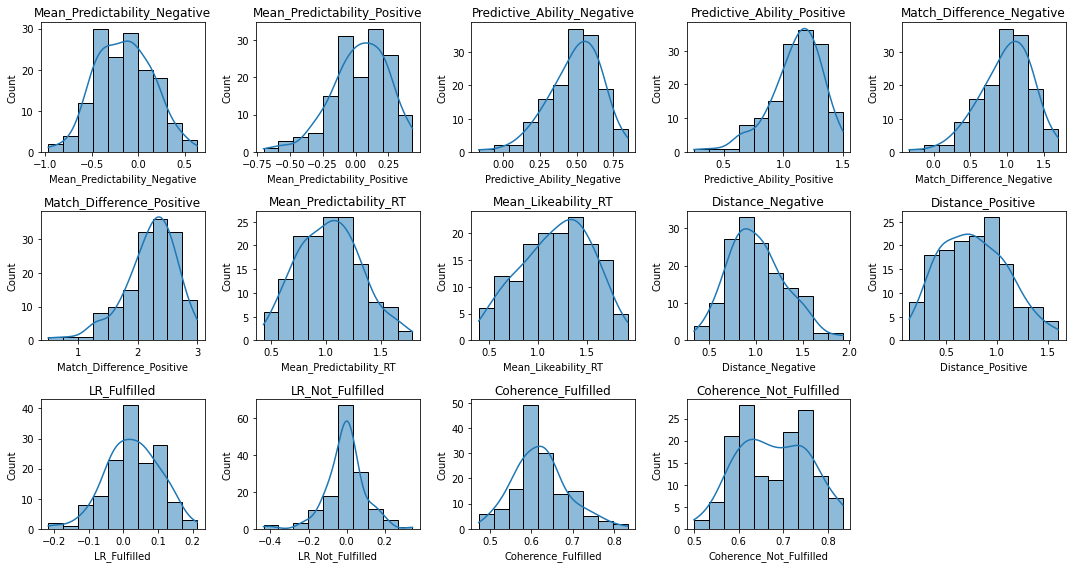

In [21]:
df_plot = df_features.drop('Participant_ID', axis=1)
                           
# Distribution plots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df_plot.columns):
    sns.histplot(df_plot[col], bins=10, ax=axes[i], kde=True)
    axes[i].set_title(col)

axes[-1].spines['top'].set_visible(False)
axes[-1].spines['right'].set_visible(False)
axes[-1].spines['bottom'].set_visible(False)
axes[-1].spines['left'].set_visible(False)
axes[-1].set_xticks([])
axes[-1].set_yticks([])

plt.tight_layout()
plt.show()


### Correlation matrix

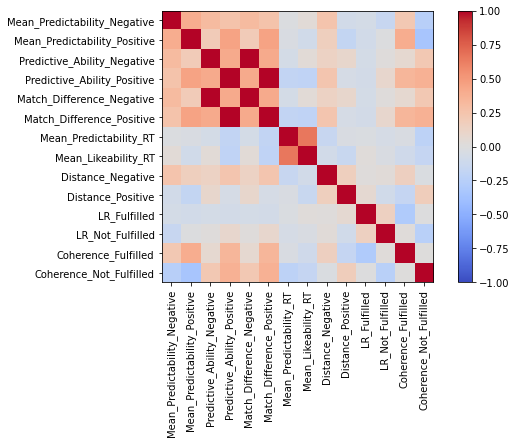

In [22]:
correlation_matrix = df_plot.corr()

plt.figure(figsize=(9, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

In [23]:
df_features.drop(['Match_Difference_Negative', 'Match_Difference_Positive'], axis=1, inplace=True)
df_features

,Participant_ID,Mean_Predictability_Negative,Mean_Predictability_Positive,Predictive_Ability_Negative,Predictive_Ability_Positive,Mean_Predictability_RT,Mean_Likeability_RT,Distance_Negative,Distance_Positive,LR_Fulfilled,LR_Not_Fulfilled,Coherence_Fulfilled,Coherence_Not_Fulfilled
0,PREDWELL_RETOS-1-1,0.366667,0.433333,0.652778,1.194444,0.953844,0.985267,1.133333,0.933333,-0.062500,-0.209091,0.750000,0.666667
1,PREDWELL_RETOS-10-1,0.033333,0.033333,0.375000,1.000000,1.057556,1.421800,0.866667,0.866667,0.000000,-0.009091,0.527778,0.583333
2,PREDWELL_RETOS-1002-1,0.166667,0.300000,0.416667,1.222222,0.849711,1.373356,0.766667,0.866667,0.121324,-0.045455,0.527778,0.625000
3,PREDWELL_RETOS-1003-1,-0.400000,-0.100000,0.500000,1.166667,0.697067,1.218022,1.066667,1.066667,0.091912,0.045455,0.666667,0.708333
4,PREDWELL_RETOS-1004-1,-0.500000,-0.366667,0.138889,0.388889,1.096356,1.764933,0.866667,0.800000,0.095588,-0.045455,0.583333,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,PREDWELL_RETOS-5-1,-0.100000,-0.233333,0.541667,0.916667,0.983622,0.860244,1.200000,1.000000,0.029412,-0.145455,0.527778,0.708333
144,PREDWELL_RETOS-6-1,-0.300000,-0.100000,0.375000,1.027778,1.137444,1.652133,0.866667,0.466667,0.029412,0.000000,0.583333,0.625000
145,PREDWELL_RETOS-7-1,-0.033333,-0.166667,0.458333,1.111111,1.226067,0.959311,0.900000,1.000000,0.000000,0.000000,0.555556,0.666667
146,PREDWELL_RETOS-8-1,0.200000,-0.233333,0.305556,1.055556,0.818778,1.153400,1.366667,0.600000,0.029412,0.045455,0.500000,0.666667


### Correlation matrix without 'Match_Difference_Negative', 'Match_Difference_Positive'

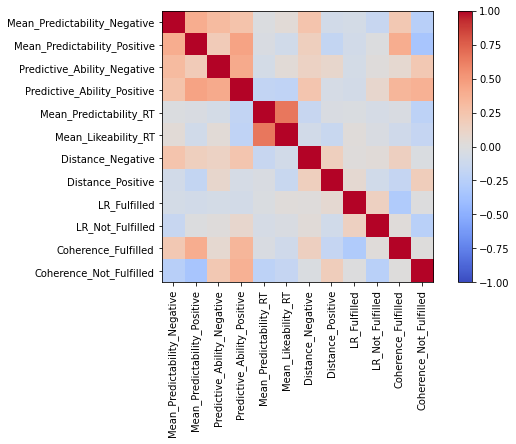

In [24]:
df_plot = df_features.drop('Participant_ID', axis=1)
correlation_matrix = df_plot.corr()

plt.figure(figsize=(9, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

### **Save features**

In [25]:
df_features.to_excel('/Users/violetapascuallaborda/Desktop/Analysis/Predictive_Processing_Features.xlsx', index=False)

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_54956/3847739091.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df_features.to_excel('/Users/violetapascuallaborda/Desktop/Analysis/Predictive_Processing_Features.xlsx', index=False)
